<a href="https://colab.research.google.com/github/Serhii-Kravchenko-2022/Home_work_Data_Science8/blob/main/Hw10_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home work 10 part 1 by
Kravchenko Serhii

convolition neron net

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same",  activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation="relu"))

model.add(Dense(10, activation="softmax"))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

In [16]:
history = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/8
938/938 [==============================] - 112s 118ms/step - loss: 0.5834 - accuracy: 0.8220 - val_loss: 0.3849 - val_accuracy: 0.8636
Epoch 2/8
938/938 [==============================] - 104s 111ms/step - loss: 0.3210 - accuracy: 0.8855 - val_loss: 0.3645 - val_accuracy: 0.8707
Epoch 3/8
938/938 [==============================] - 115s 122ms/step - loss: 0.2749 - accuracy: 0.9005 - val_loss: 0.3048 - val_accuracy: 0.8870
Epoch 4/8
938/938 [==============================] - 108s 115ms/step - loss: 0.2484 - accuracy: 0.9113 - val_loss: 0.2992 - val_accuracy: 0.8918
Epoch 5/8
938/938 [==============================] - 108s 115ms/step - loss: 0.2268 - accuracy: 0.9170 - val_loss: 0.2808 - val_accuracy: 0.9021
Epoch 6/8
938/938 [==============================] - 109s 116ms/step - loss: 0.2125 - accuracy: 0.9223 - val_loss: 0.2735 - val_accuracy: 0.9053
Epoch 7/8
938/938 [==============================] - 108s 115ms/step - loss: 0.1954 - accuracy: 0.9285 - val_loss: 0.2857 - val_ac

In [9]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 28s 89ms/step - loss: 0.2776 - accuracy: 0.9079


[0.2775859236717224, 0.9078999757766724]

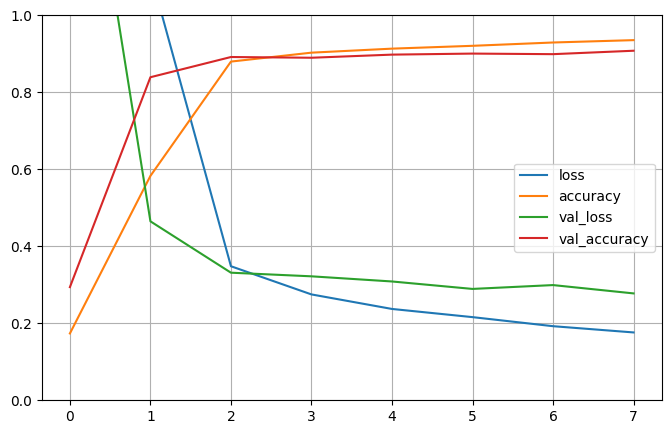

In [10]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1/1 [==============================] - 0s 108ms/step


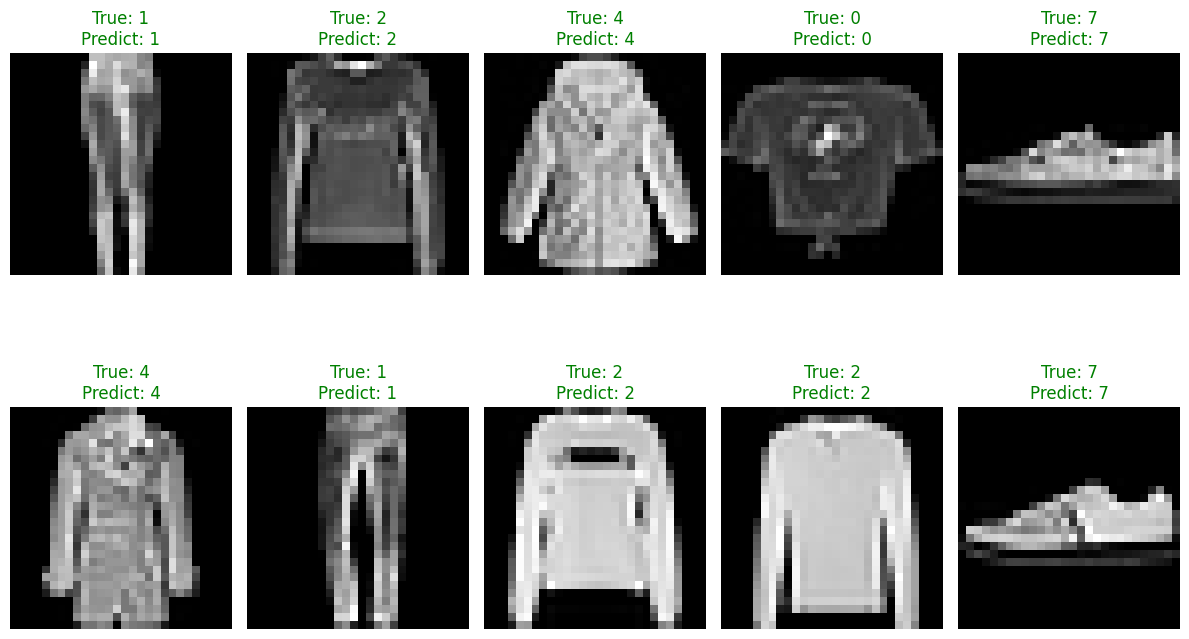

In [17]:
import random

images_count = 10
random_indices = np.random.choice(range(len(X_test)), size=images_count, replace=False)


test_image = X_test[random_indices]
test_values = y_test[random_indices]


predict = model.predict(test_image)
predict_values = np.argmax(predict, axis=1)

plt.figure(figsize=(12, 8))

for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title("True: %s\nPredict: %s" % (test_values[i], predict_values[i]), color=("green" if predict_values[i] == test_values[i] else "red"))
    plt.axis('off')

plt.tight_layout()
plt.show()

Висновок: порівнюючи звичайну мережу та згорткову мережу, бачимо, що згорткова показала вищу точність 0,9 проти 0,89. Але час навчання згорткової мережі в декілька разів більше.